<div id="container" style="position:relative;">
<div style="float:left"><h1> BrainStation Capstone </h1></div>
<div style="position:relative; float:right"><img style="height:65px" src ="https://drive.google.com/uc?export=view&id=1EnB0x-fdqMp6I5iMoEBBEuxB_s7AmE2k" />
</div>
</div>

### *Brain tumor detection & Machine learning*

`Notebook 1: Data Exploration & Cleaning` <br>
Author: Bilal Munir <br>
Date: June 2023

---
## Table of Contents
- 0.0 [Introduction](#Introduction)
- 1.0 [Loading my first images](#1.0-Loading-my-first-images)
  - Developing Understanding of how to use 
- 2.0 [Exploring category distribution](#2.0-Exploring-Category-Distribution)
  - Observing how many images each folder has etc.
- 3.0 [Loading in ALL the image data](#3.0-Loading-in-all-the-image-data-and-necessary-variables)
- 4.0 [Classification Dataframe](#4.0-Creating-a-classification-dataframe)
- 5.0 [Mean of different tumor categories](#5.0-Observing-the-average-of-the-MRI-matrices)

## Introduction

**Problem Statement:** Can we leverage machine learning to provide timely diagnoses of brain cancer by detecting tumors prematurely?

**Magnetic Resonance Imaging (MRI)** is a medical imaging technique that uses magnetic fields to generate images of the internal structures of the body. It is useful in providing medical insights and **diagnostic information** to specialists so they can determine the appropriate course of action in treating their patients. 

The survival rate for cancer in the past ten years has been around 30%. Unfortunately, you cannot prevent brain tumors by simply changing your lifestyle (diet, exercise etc). According to the American Cancer Society, you can reduce the risk by limiting radiation exposure to the head.

Since there is no way to prevent it from happening, the best solution is to identify the anomalies early and begin treatment as soon as possible. This project will hopefully serve as a small step towards accurately detecting the presence of tumors and in the future, be able to classify them, thereby speeding up the diagnosis.

**Dataset:**
This notebook explores a dataset that contains almost 4500 Brain MRIs. It was obtained from a diagnostic imaging clinic in Brazil. <br>[Dataset_Link](https://www.kaggle.com/datasets/fernando2rad/brain-tumor-mri-images-44c)

In [1]:
# Importing all the Necessary Libraries
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# SKLEARN Imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

import glob
import zipfile

## 1.0 Loading my first images 

Unzipping the image data archive with glob and zipfile. You may choose to manually unzip the folder. Keep in mind howver, that while loading the images they follow a specific path *`data/raw/[category_name]/[image_file]`*

In [2]:
#files = glob.glob('data/*.zip')
#files

In [3]:
#for file in files:
#    print('Unzipping:', file)
    
#    with zipfile.ZipFile(file, 'r') as zip_ref:
#        zip_ref.extractall('data/raw')

Loading the First Image Ever to see how it looks. First as a numpy matrix.

In [4]:
one_img = np.asarray(Image.open('data/raw/_NORMAL T1/0f66b80311697aa7de23d3b52c736c_big_gallery.jpeg'))
print(repr(one_img))

array([[2, 2, 2, ..., 2, 1, 1],
       [2, 2, 2, ..., 2, 1, 1],
       [2, 2, 2, ..., 2, 1, 1],
       ...,
       [2, 2, 2, ..., 2, 2, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 0, 0]], dtype=uint8)


Plotting the first image using plt.imshow()

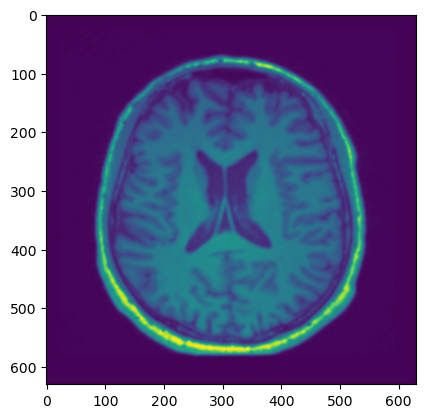

In [5]:
imgplot = plt.imshow(one_img)

The plot gives this purplish/Greenish hue and not the grayscaled format that I was initially expecting.

I learned that in order to view this image in the gray scale format, I would have to adjust the parameters of the *plt.imshow()* function like so,

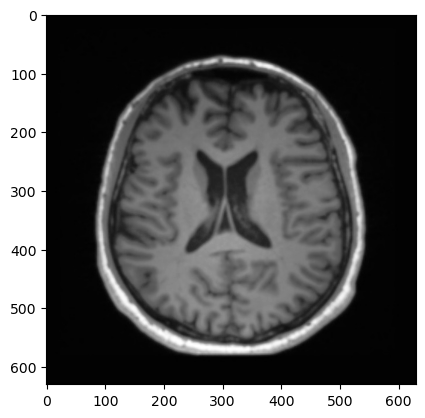

In [6]:
imgplot = plt.imshow(255 - one_img, cmap='Greys')

In [7]:
one_img.shape

(630, 630)

*Noted that a common dimension of the MRIs in this dataset is 630 by 630 

In order to explore this dataset we will need to utilize the **os library**. It will help us retrieve the file paths for each image.

---
## 2.0 Exploring Category Distribution

In [8]:
# Importing the os library
import os

In [9]:
# Displaying the different classes of images
Category_List = os.listdir('data/raw')
Category_List

['Astrocitoma T1',
 'Astrocitoma T1C+',
 'Astrocitoma T2',
 'Carcinoma T1',
 'Carcinoma T1C+',
 'Carcinoma T2',
 'Ependimoma T1',
 'Ependimoma T1C+',
 'Ependimoma T2',
 'Ganglioglioma T1',
 'Ganglioglioma T1C+',
 'Ganglioglioma T2',
 'Germinoma T1',
 'Germinoma T1C+',
 'Germinoma T2',
 'Glioblastoma T1',
 'Glioblastoma T1C+',
 'Glioblastoma T2',
 'Granuloma T1',
 'Granuloma T1C+',
 'Granuloma T2',
 'Meduloblastoma T1',
 'Meduloblastoma T1C+',
 'Meduloblastoma T2',
 'Meningioma T1',
 'Meningioma T1C+',
 'Meningioma T2',
 'Neurocitoma T1',
 'Neurocitoma T1C+',
 'Neurocitoma T2',
 'Oligodendroglioma T1',
 'Oligodendroglioma T1C+',
 'Oligodendroglioma T2',
 'Papiloma T1',
 'Papiloma T1C+',
 'Papiloma T2',
 'Schwannoma T1',
 'Schwannoma T1C+',
 'Schwannoma T2',
 'Tuberculoma T1',
 'Tuberculoma T1C+',
 'Tuberculoma T2',
 '_NORMAL T1',
 '_NORMAL T2']

Here we see the displayed classes of folders which contains **14 different classes of tumors**, Astrocitoma, Carcinoma, Ependimoma etc.

We also notice that each class of Tumor is divided into 3 separate sections (T1, T1C+ and T2). These are MRI weightings which highlight different parts of the brain. T1 weighted images are able to highlight areas with subcutaneous fat while T2 images are able to enhance the hydrated areas of the brain much more.

In [10]:
# Number of images per class folder.
Num_Images = []
for category in Category_List:
    num_files = len(os.listdir(f'data/raw/{category}'))
    Num_Images.append(num_files)
    
Num_Images

[176,
 233,
 171,
 66,
 112,
 73,
 45,
 48,
 57,
 20,
 18,
 23,
 27,
 40,
 33,
 55,
 94,
 55,
 30,
 31,
 17,
 23,
 67,
 41,
 272,
 369,
 233,
 130,
 223,
 104,
 86,
 72,
 66,
 66,
 108,
 63,
 148,
 194,
 123,
 28,
 84,
 33,
 251,
 271]

In [11]:
# Total number of images
sum(Num_Images)

4479

Plotting a simple bar graph showcasing the amount of images per class

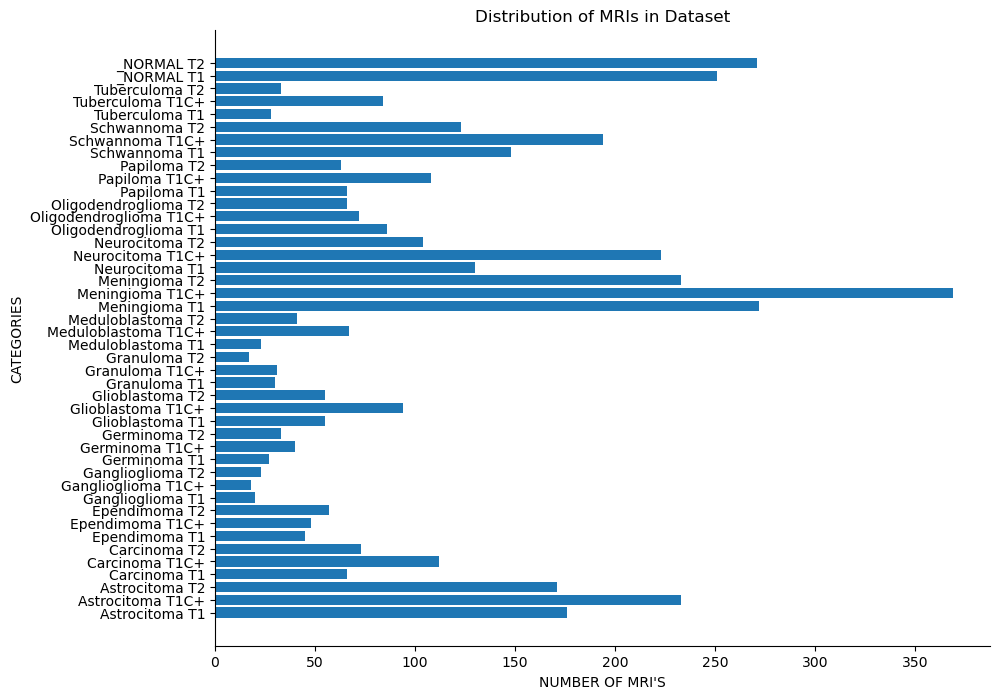

In [12]:
plt.figure(figsize=(10,8))
plt.barh(Category_List, Num_Images)

plt.title('Distribution of MRIs in Dataset')
plt.xlabel("NUMBER OF MRI'S")
plt.ylabel('CATEGORIES')

sns.despine()
plt.show()

It is worth noting that right off the bat we can see that there is a severe **class imbalance between the number of healthy vs unhealthy brains.**

Creating a dictionary that attaches individual image paths to their respective **key** classes. 

For example `Astrocitoma T1` will be the key and all the items of that key will be the image paths in the `Astrocitoma T1` folder. This will come in handy when categorizing as well as loading in the images as matrices.

---
## 3.0 Loading in all the image data and necessary variables 

In [13]:
# Defining file_paths dictionary
file_paths = {}
for category in Category_List:
    file_paths[category] = []
    for file in os.listdir(f'data/raw/{category}'):
       # print(f'data/raw/{category}/{file}')
        
        file_paths[category].append(f'data/raw/{category}/{file}')

Now to add all the image matrices, Classifications and file names to their own respective lists

In [14]:
# Creating empty lists for the images, classifications and file names
imgs = []
classification = []
file_names = []

# A for-loop to append all necessary items to the lists
for key, item in file_paths.items():
    
    for file_name in item:
        
        # Opening the images
        img = Image.open(file_name)
        
        # Resizing the images to 224x224
        img = img.resize((224, 224))
        
        # Converting images to grey scale
        img = img.convert(mode='L')
        
        # Loading the normalized image
        load_img = np.asarray(img)
        
        # then append grey images
        file_names.append(file_name)
        imgs.append(load_img)
        classification.append(key)

The reasoning behind reducing every image size to 224 by 224 as well as removing any color channels is to simply reduce any complexity the models have to face when classifying the image. Additionally speaking, processing large size images on your local machine is computationally heavy, especially when you are running a slower system.

I had the opportunity to run one of my models on the cloud using the Sagemaker service in **Amazon Web Services (AWS)** where the size of each image was 500 by 500. This meant that I trained data with 250,000 features in total which would be impossible to run on my current computer. Thankfully I was able to obtain similar results with the reduced image size on my local system. I will mention those results in the 2nd notebook

In [15]:
# Total images
print(f"There are a total of {len(imgs)} images in the dataset.")

There are a total of 4479 images in the dataset.


Sanity check to see if all the shapes have been reduced to the same size.

In [16]:
shapes = []
for i in range(len(imgs)):
    shapes.append(imgs[i].shape)

Creating a dataframe that will 

In [17]:
# dictionary of lists 
dict = {'Tumor_Class': classification, 'file_path': file_names, 'Shapes': shapes} 

In [18]:
Tumors_df = pd.DataFrame(dict)
Tumors_df.head()

,Tumor_Class,file_path,Shapes
0,Astrocitoma T1,data/raw/Astrocitoma T1/005_big_gallery.jpeg,"(224, 224)"
1,Astrocitoma T1,data/raw/Astrocitoma T1/006_big_gallery.jpeg,"(224, 224)"
2,Astrocitoma T1,data/raw/Astrocitoma T1/01809e58d2c1e7fff56cc5...,"(224, 224)"
3,Astrocitoma T1,data/raw/Astrocitoma T1/02df132a56dfb89ece42ee...,"(224, 224)"
4,Astrocitoma T1,data/raw/Astrocitoma T1/044d8d9984902ca03e652a...,"(224, 224)"


In [19]:
Tumors_df['Shapes'].value_counts()

(224, 224)    4479
Name: Shapes, dtype: int64

Now we know for sure that the all the images have been reduced to 224 x 224, We no longer need the shapes column

In [20]:
Tumors_df = Tumors_df.drop('Shapes', axis=1)
Tumors_df.head()

,Tumor_Class,file_path
0,Astrocitoma T1,data/raw/Astrocitoma T1/005_big_gallery.jpeg
1,Astrocitoma T1,data/raw/Astrocitoma T1/006_big_gallery.jpeg
2,Astrocitoma T1,data/raw/Astrocitoma T1/01809e58d2c1e7fff56cc5...
3,Astrocitoma T1,data/raw/Astrocitoma T1/02df132a56dfb89ece42ee...
4,Astrocitoma T1,data/raw/Astrocitoma T1/044d8d9984902ca03e652a...


---
## 4.0 Creating a classification dataframe

Adding a boolean column which indicates whether an MRI has a tumor in it or not. **Creating two classes**<br>
If MRI is healthy with **no tumors**, it is classified as **0**, if the opposite, then **1**

In [21]:
Tumors_df['Tumor_Presence'] = np.where(Tumors_df['Tumor_Class'].str.contains('NORMAL'), 0, 1)

In [22]:
Tumors_df.head()

,Tumor_Class,file_path,Tumor_Presence
0,Astrocitoma T1,data/raw/Astrocitoma T1/005_big_gallery.jpeg,1
1,Astrocitoma T1,data/raw/Astrocitoma T1/006_big_gallery.jpeg,1
2,Astrocitoma T1,data/raw/Astrocitoma T1/01809e58d2c1e7fff56cc5...,1
3,Astrocitoma T1,data/raw/Astrocitoma T1/02df132a56dfb89ece42ee...,1
4,Astrocitoma T1,data/raw/Astrocitoma T1/044d8d9984902ca03e652a...,1


In [23]:
# Checking to see if the NORMAL MRIs were assigned the proper class.
Tumors_df.loc[Tumors_df['Tumor_Class'].str.contains('NORMAL')]

,Tumor_Class,file_path,Tumor_Presence
3957,_NORMAL T1,data/raw/_NORMAL T1/03a9560561f3e35f24f6ce6215...,0
3958,_NORMAL T1,data/raw/_NORMAL T1/03b8cddedf7fef67b544b2b2e5...,0
3959,_NORMAL T1,data/raw/_NORMAL T1/04024298ac9373718c8a182dad...,0
3960,_NORMAL T1,data/raw/_NORMAL T1/05a82e8e2a2e8687bcb7eab955...,0
3961,_NORMAL T1,data/raw/_NORMAL T1/06ef0176098202e137466b1c4c...,0
...,...,...,...
4474,_NORMAL T2,data/raw/_NORMAL T2/fda92e9e884f718f8240320b18...,0
4475,_NORMAL T2,data/raw/_NORMAL T2/fdffa3aa06bcd0d7445d1da35a...,0
4476,_NORMAL T2,data/raw/_NORMAL T2/fe9adef1dd65812a09089bc647...,0
4477,_NORMAL T2,data/raw/_NORMAL T2/ff.jpg,0


A total of 522 MRIs which have no tumor.

In [24]:
# Additional Sanity Check to confirm above statement
Tumors_df['Tumor_Presence'].value_counts(normalize=True)

1    0.883456
0    0.116544
Name: Tumor_Presence, dtype: float64

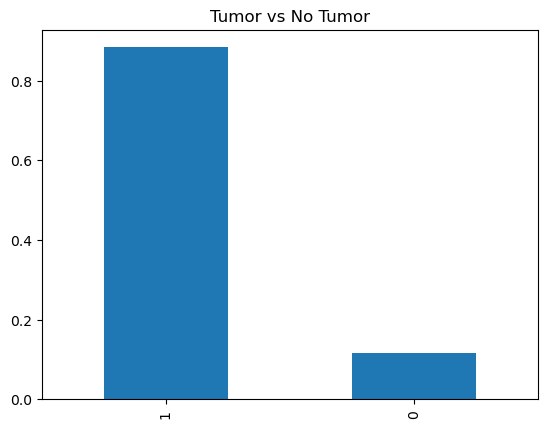

In [25]:
# Plotting the data imbalance
plt.figure()
Tumors_df['Tumor_Presence'].value_counts(normalize=True).plot(kind='bar')
plt.title('Tumor vs No Tumor')
plt.show()

**An 88% to 12% split**! This confirms my previous observation of there being a **severe class imbalance.** A possible solution to this could be an upsample of the minority class. 

**Having a look at how the images were converted to grayscale.**

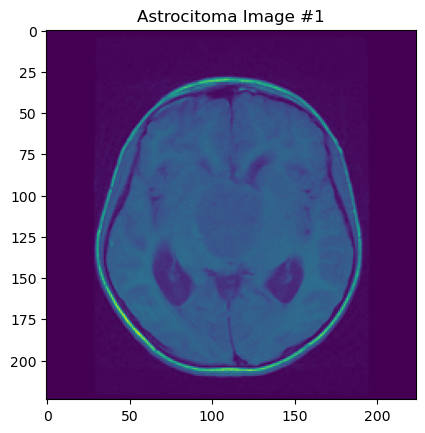

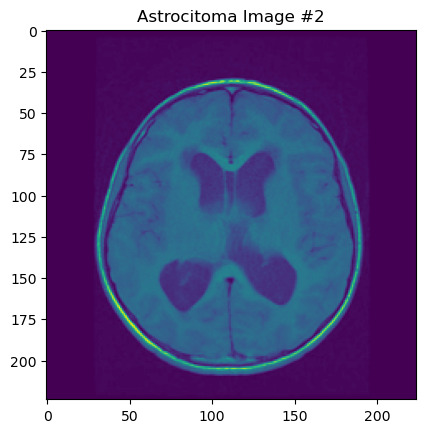

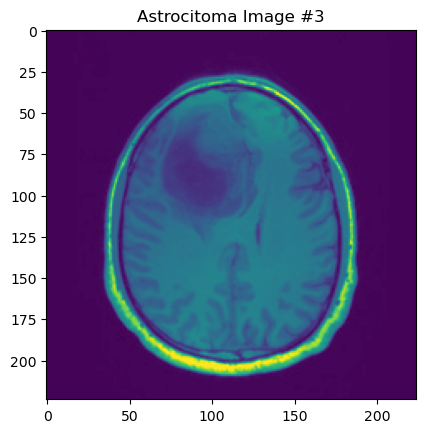

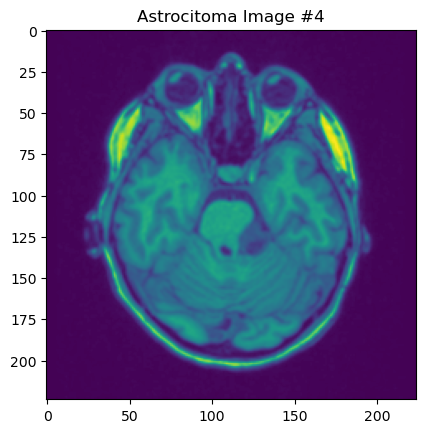

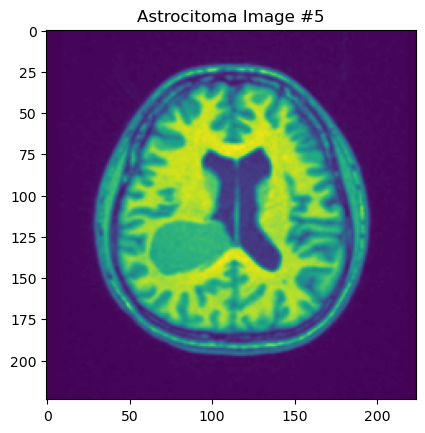

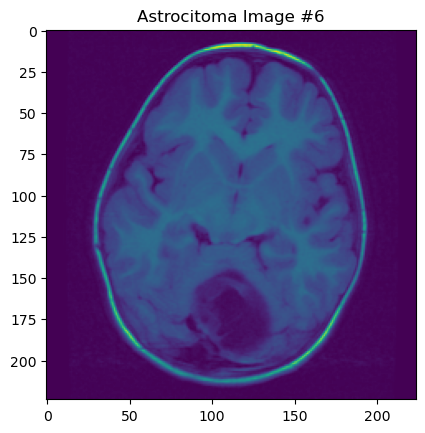

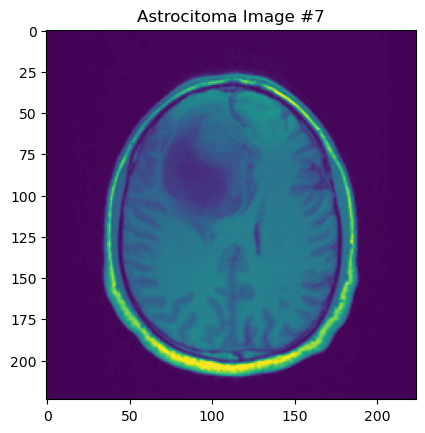

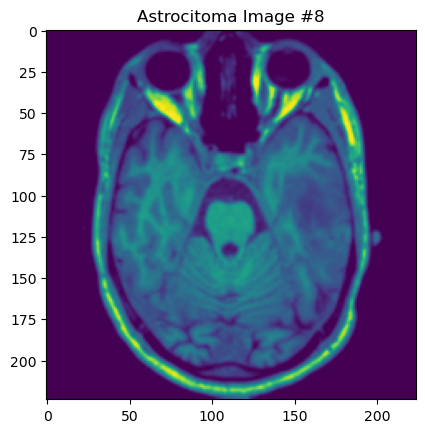

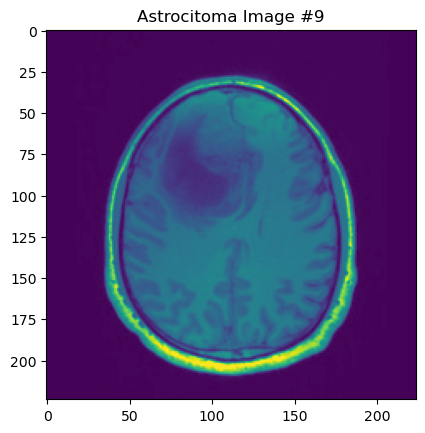

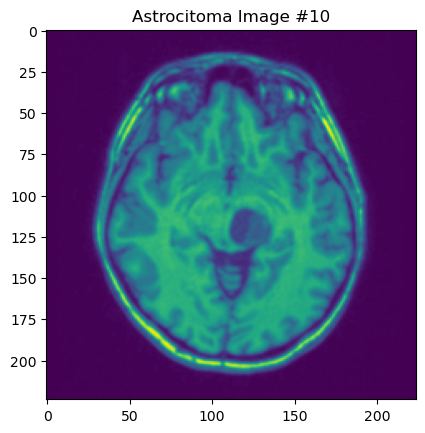

In [26]:
for i in range(10):
    plt.figure()
    plt.title(f"Astrocitoma Image #{i+1}")
    plt.imshow(imgs[i])
    plt.show()

Here I notice that greenish purple hue once more. This can only mean that this is how python interprets images that are 2-dimensional with no color channels. I can trust that it will not be a problem for these images to pass through our models since the necessary changes have been made.

Now we stack all the numpy images on top of each other so that they coincide with their respective classes and paths in the `Tumors_df` dataframe. This will ensure that when they pass through a model, the images will be classified as **'Having a Tumor':1**  OR **'No Tumor':0**

In [27]:
stacked_images = np.stack(imgs, axis=0)
stacked_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        ...,
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

---
## 5.0 Observing the average of the MRI matrices

Great! Now I will take the average of all the matrices and observe any variances that might be present.

In [28]:
mean = stacked_images.mean(axis=0)

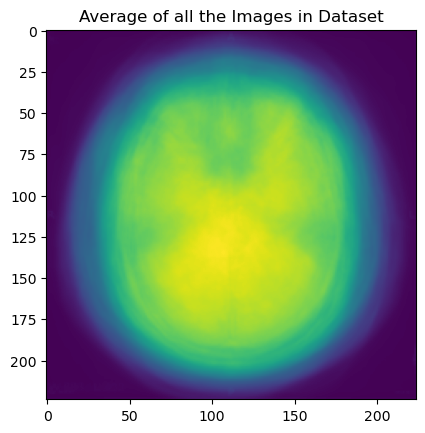

In [29]:
plt.figure()
plt.imshow(mean)
plt.title('Average of all the Images in Dataset')
plt.show()

We observe the general vertical oval shape of the brain being highlighted in the middle as this yellowish green color. However there is also this noticeable variance in shape at the border of the oval, presenting a more **circular brain**. 

The reason for this can be attributed to the changing of all the image sizes to have perfect square dimensions. Since initially in the dataset, not all MRIs were this perfect square shape, there has been some distortion as a result of the resizing.

In [30]:
#Taking the average of all the matrices with healthy brains
NORMAL_Mean = stacked_images[3957:4479].mean(axis=0)

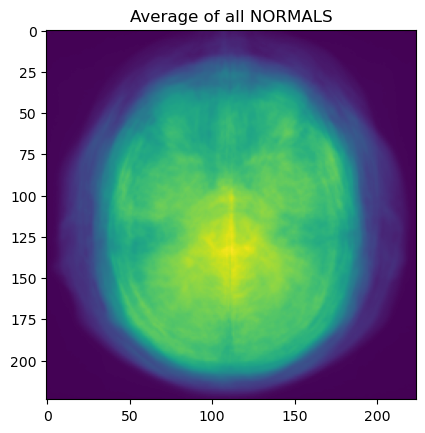

In [31]:
plt.figure()
plt.imshow(NORMAL_Mean)
plt.title('Average of all NORMALS')
plt.show()

In [32]:
# Astrocitoma Mean
Astrocitoma_Mean = stacked_images[:580].mean(axis=0)

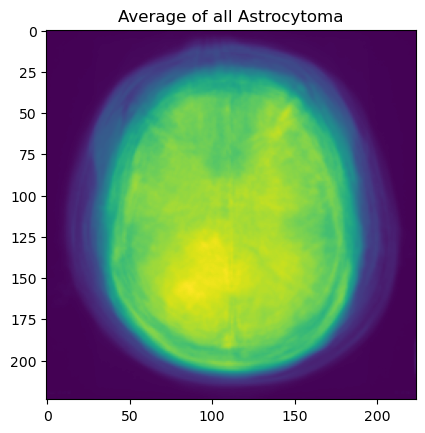

In [33]:
plt.figure()
plt.imshow(Astrocitoma_Mean)
plt.title('Average of all Astrocytoma')
plt.show()

In [34]:
# Meningioma Mean
Meningioma_Mean = stacked_images[1555:2429].mean(axis=0)

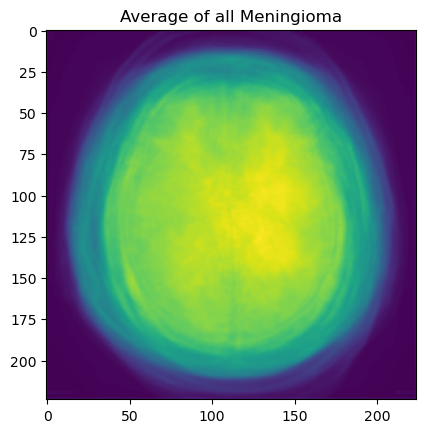

In [35]:
plt.figure()
plt.imshow(Meningioma_Mean)
plt.title('Average of all Meningioma')
plt.show()

In [36]:
# Saving the Tumor_df so data can be loaded from other notebooks
#Tumors_df.to_csv('data/Tumors_df.csv', index=False)